# Ejercicios de clase - Thevenin
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

## Problema N°1
1.1 Hallar el circuito equivalente de Thevenin entre los puntos A y B.

1.2 Hallar el circuito equivalente de Norton entre los puntos A y B.

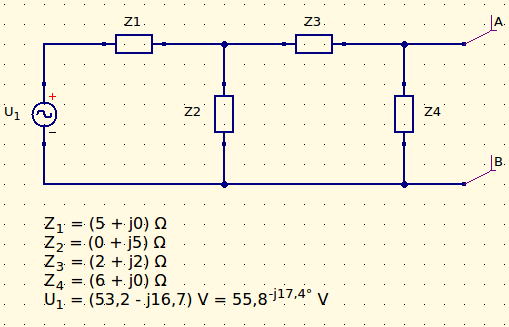

### Solución

* __Cálculo de $Z_{th}$__      

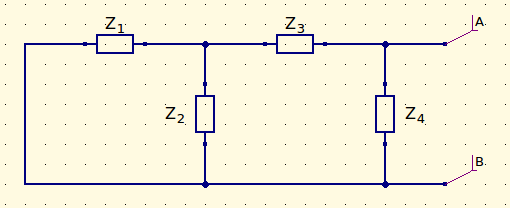

1)  $Z_1 || Z_2$     
2)  $(Z_1 || Z_2) + Z_3$      
3) $[(Z_1 || Z_2) + Z_3] || Z_4$

1) Hacemos $Z_1 || Z_2$

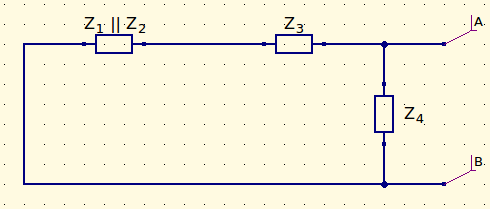

$$ \frac{Z_1 \cdot Z_2}{Z_1 + Z_2} = \frac{5e^{j0^\circ} \cdot 5e^{j90^\circ}}{(5 + j0) + (0 + j5)} $$

$$
= \frac{25^{j90^\circ}}{5 + j5} = \frac{25e^{j90^\circ}}{\sqrt{50} e^{j45^\circ}} = 3,54e^{j45^\circ} \, \Omega
$$

$$
\rightarrow 2,5 + j2,5 \, \Omega
$$

2)  $(Z_1 || Z_2) + Z_3$

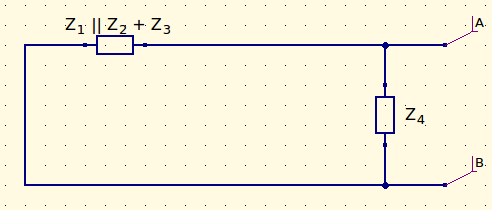

$$ (2,5 + j2,5) + (2 + j2) = 4,5 + j4,5 \, \Omega $$

$$
\rightarrow  6,36e^{j45} \, \Omega
$$

3) $\left[(Z_1 || Z_2) + Z_3 \right]  \, || \, Z_4$

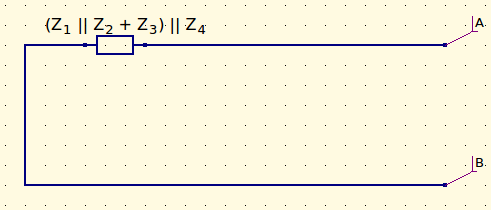

$$ = \frac{6,36e^{j45^\circ} \cdot 6e^{j0^\circ}}{(4,5 + j4,5) + (6 + j0)} = \frac{38,18e^{j45^\circ}}{10,45 + j4,5} $$

$$
= \frac{38,18e^{j45^\circ}}{11,42e^{j23,2^\circ}} = 3,34e^{j21,8^\circ}
$$

<div class="alert-info"><strong>Por lo tanto</strong>
$$ Z_{th} =3,34e^{j21,8} \, \Omega = (3,1 + j1,2) \, \Omega $$
    </div>

* __Cálculo de $V_{th}$__

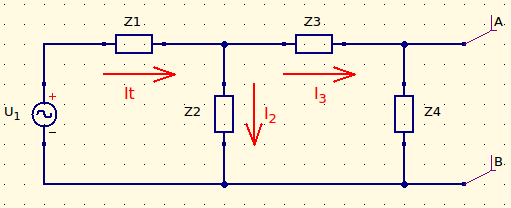

$V_{th} = V_{AB} = V_{Z_4}$

1) $Z_4 + Z_3$

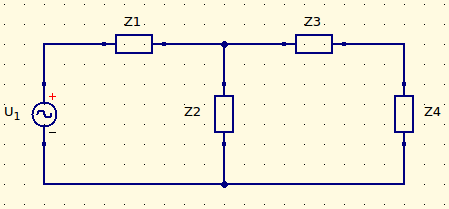

$$ = (6 + j0) + (2 + j2) = 8 + j2 $$

$$
\rightarrow \sqrt{68} e^{j14^\circ}
$$

2) $(Z_4 + Z_3) || Z_2$

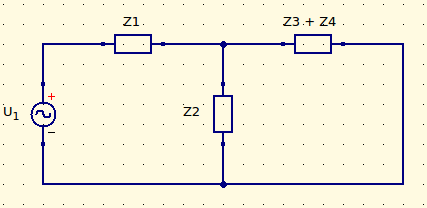

$$ = \frac{\sqrt{68} e^{j14^\circ} \cdot 5e^{j90^\circ}}{(8 + j2) + (0 + j5)} = \frac{5 \sqrt{68} e^{j104^\circ} }{8 + j7} $$

$$
= \frac{ 5 \sqrt{68} e^{j104^\circ} }{\sqrt{113} e^{j41,18^\circ} } = 3,88e^{j62,85^\circ}
$$

$$ \rightarrow (1,77 + j3,45) \, \Omega $$

3) $[(Z_4 + Z_3) || Z_2] + Z_1 $

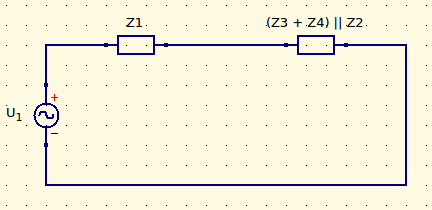

$$ Z_{eq} = (1,77 + j3,45) + (5 + j0) $$

$$
= (6,77 + j3,45) \, \Omega
$$

$$
\rightarrow 7,60e^{j27^\circ} \, \Omega
$$

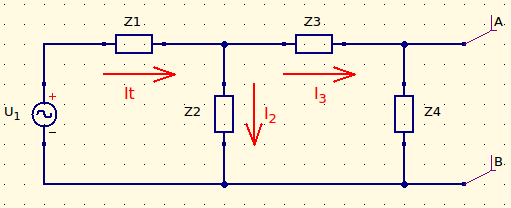

__Cálculo  de $I_t$__
$$ I_t = \frac{U}{Z_{eq}} = \frac{55,8e^{-j17,4^\circ}}{7,60e^{j27}} = 7,34e^{-j44,4^\circ} \, \mathrm{A} $$

__Cálculo de $V_{Z1}$__

$$ V_{Z_1} = I_t Z_1 = 7,34e^{-j44,4^\circ} 5e^{j0^\circ} = 36,7e^{-j44,4^\circ} \, \mathrm{V} $$

__Cálculo de $V_{Z_2}$__

$$ V_{Z_2} = V - V_{Z_1} = (27,02 + j9,01) \, \mathrm{V} \quad \rightarrow 28,48e^{18,44^\circ} \, \mathrm{V} $$

__Cálculo de $I_3$__

$$ I_3 = \frac{V_{Z_2}}{Z_3 + Z_4} = \frac{28,48e^{j18,44^\circ}}{\sqrt{68}e^{j14}} = 3,45e^{j4,40^\circ} \, \mathrm{V} $$

<div class="alert-info"><strong>Cálculo de $V_{th}$</strong>
$$ V_{th} = V_{AB} = V_{Z_4} = I_3 Z_4 = 20,72 e^{j4,40^\circ} \, \mathrm{V}$$
    </div>

### Usando python para calcular (opcional)

In [ ]:
import math, cmath

In [ ]:
# Datos:
U = cmath.rect(55.8, math.radians(-17.4) )
Z1 = 5 + 0j
Z2 = 0 + 5j
Z3 = 2 + 2j
Z4 = 6 + 0j

In [ ]:
# Cálculo de Z1 || Z2
ans1 = (Z1*Z2)/(Z1+Z2)

# Cálculo de (Z1 || Z2) || Z3
ans2 = ans1 + Z3

# Cálculo de Zth
Zth = (ans2*Z4)/(ans2 + Z4)
Zthpol = cmath.polar(Zth)

# Cálculo de Z3 + Z4
ans3 = Z4 + Z3

# Cálculo (Z4 + Z3) || Z2 
ans4 = (ans3*Z2)/(ans3 + Z2)

# Cálculo de Zeq
Zeq = ans4 + Z1

# Cálculo de It
It = U/Zeq

# Cálculo de V_z1
V_z1 = It * Z1

# Cálculo de V_z2
V_z2 = U - V_z1

# Cálculo de I3
I3 = V_z2/(Z3 + Z4)
I3pol = cmath.polar(I3)

# Cálculo de Vth
Vth = I3*Z4
Vth_pol = cmath.polar(Vth)

In [ ]:
#@title Imprime
print('Resultados:')
print('-----------------------------------------')
print('Zth = (%.2f < %.2f°) Ohm'%(Zthpol[0], math.degrees(Zthpol[1]) ) )
print('Zth = {:.2f} Ohm'.format(Zth))
print('-----------------------------------------')
print('Vth = (%.2f < %.2f°) V'%(Vth_pol[0], math.degrees(Vth_pol[1]) ))
print('Vth = {:.2f} V'.format(Vth))
print('-----------------------------------------')

Resultados:
-----------------------------------------
Zth = (3.34 < 21.80°) Ohm
Zth = 3.10+1.24j Ohm
-----------------------------------------
Vth = (20.72 < 4.40°) V
Vth = 20.66+1.59j V
-----------------------------------------


In [ ]:
%reset -s -f